In [4]:
# Gerekli olan kütüphaneleri import ediyorum
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor


import joblib


In [5]:
# Bu bölümde veriyi inceliyorum sadece
data_file_name = "1-output-before.json"

In [6]:
# Veriyi data frame nesnesi olarak içeri aktarıyoruz
base_df = pd.read_json(data_file_name, encoding='utf-8')

In [7]:
# Veriye genel bir bakış atıyoruz.
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52658 entries, 0 to 52657
Data columns (total 100 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     52658 non-null  object 
 1   İlan No                 52658 non-null  int64  
 2   İlan Tarihi             52658 non-null  object 
 3   Marka                   52107 non-null  object 
 4   Seri                    51717 non-null  object 
 5   Model                   49659 non-null  object 
 6   Yıl                     52658 non-null  int64  
 7   Kilometre               51508 non-null  object 
 8   Vites Tipi              51671 non-null  object 
 9   Yakıt Tipi              51665 non-null  object 
 10  Kasa Tipi               48439 non-null  object 
 11  Renk                    49972 non-null  object 
 12  Motor Hacmi             49913 non-null  object 
 13  Motor Gücü              50021 non-null  object 
 14  Çekiş                   44646 non-nul

In [8]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [9]:
check_df(dataframe = base_df, head = 5)

##################### Shape #####################
(52658, 100)
##################### Types #####################
_id                    object
İlan No                 int64
İlan Tarihi            object
Marka                  object
Seri                   object
                       ...   
Göz Sayısı            float64
Şasi Tipi              object
Asansör Yüksekliği     object
Dikey Uzunluk          object
Yatay Uzunluk          object
Length: 100, dtype: object
##################### Head #####################
                                    _id   İlan No    İlan Tarihi       Marka  \
0  {'$oid': '6567cd925f379fc6cb264beb'}  23436256  28 Kasım 2023     Citroen   
1  {'$oid': '6567cd9e5f379fc6cb264bec'}  23435957  28 Kasım 2023  Volkswagen   
2  {'$oid': '6567cda95f379fc6cb264bed'}  23875932  27 Kasım 2023        Opel   
3  {'$oid': '6567cdb45f379fc6cb264bee'}  23691797  27 Kasım 2023        Opel   
4  {'$oid': '6567cdbe5f379fc6cb264bef'}  23507140  26 Kasım 2023        Ford   



DATA CLEANING

In [10]:
# işimize yarayan verileri alıyoruz.
needed_attributes = ["Marka","Seri","Model","Yıl","Kilometre","Yakıt Tipi","Kasa Tipi","Vites Tipi","Motor Hacmi","Motor Gücü","Kimden","Fiyat"]
useful_df = base_df[needed_attributes]

In [11]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52658 entries, 0 to 52657
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Marka        52107 non-null  object
 1   Seri         51717 non-null  object
 2   Model        49659 non-null  object
 3   Yıl          52658 non-null  int64 
 4   Kilometre    51508 non-null  object
 5   Yakıt Tipi   51665 non-null  object
 6   Kasa Tipi    48439 non-null  object
 7   Vites Tipi   51671 non-null  object
 8   Motor Hacmi  49913 non-null  object
 9   Motor Gücü   50021 non-null  object
 10  Kimden       52658 non-null  object
 11  Fiyat        52658 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.8+ MB


In [12]:
# Null değerlerİ siliyoruz.
useful_df.dropna(inplace=True)
useful_df.reset_index(drop=True, inplace=True)
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46495 entries, 0 to 46494
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Marka        46495 non-null  object
 1   Seri         46495 non-null  object
 2   Model        46495 non-null  object
 3   Yıl          46495 non-null  int64 
 4   Kilometre    46495 non-null  object
 5   Yakıt Tipi   46495 non-null  object
 6   Kasa Tipi    46495 non-null  object
 7   Vites Tipi   46495 non-null  object
 8   Motor Hacmi  46495 non-null  object
 9   Motor Gücü   46495 non-null  object
 10  Kimden       46495 non-null  object
 11  Fiyat        46495 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.3+ MB


/var/folders/hp/d5nqk4nd0jbfjv8r943rc63r0000gn/T/ipykernel_48450/211067478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.dropna(inplace=True)


Data Preprocessing

In [13]:
# Bu kısımda elimdeki verileri float yada int türüne dönüştürmem lazım. Kısaca encode kısmı
# Kategorik sütunların encode edilmesi lazım.
# string formatındaki sayılar int'e çevirilmeli ve normalize edilmeli.
# Eğer çok fazla model varsa. Model sütunu drop edilebilir

need_encode = ["Marka","Seri","Model","Yakıt Tipi","Kasa Tipi","Vites Tipi","Kimden"]

In [14]:
# unique değerlerin sayısını hesaplıyoruz.
number_of_unique = useful_df[need_encode].nunique()

print(number_of_unique)

# 3932 tane unique model ismi var. Bunu encode edemeyiz. Numaralandırmak mümkün ama bu sefer de model numaralara göre öğrenim gerçekleştiricek ve yanlış sonuç vericek
# Model sütununu droplamamız aynı şekilde Seri sütunuda çok fazla unique değere sahip.

useful_df.drop(axis=1,columns=["Model","Seri"], inplace=True)

Marka           68
Seri           693
Model         3932
Yakıt Tipi       5
Kasa Tipi       20
Vites Tipi       3
Kimden           3
dtype: int64


/var/folders/hp/d5nqk4nd0jbfjv8r943rc63r0000gn/T/ipykernel_48450/687092981.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.drop(axis=1,columns=["Model","Seri"], inplace=True)


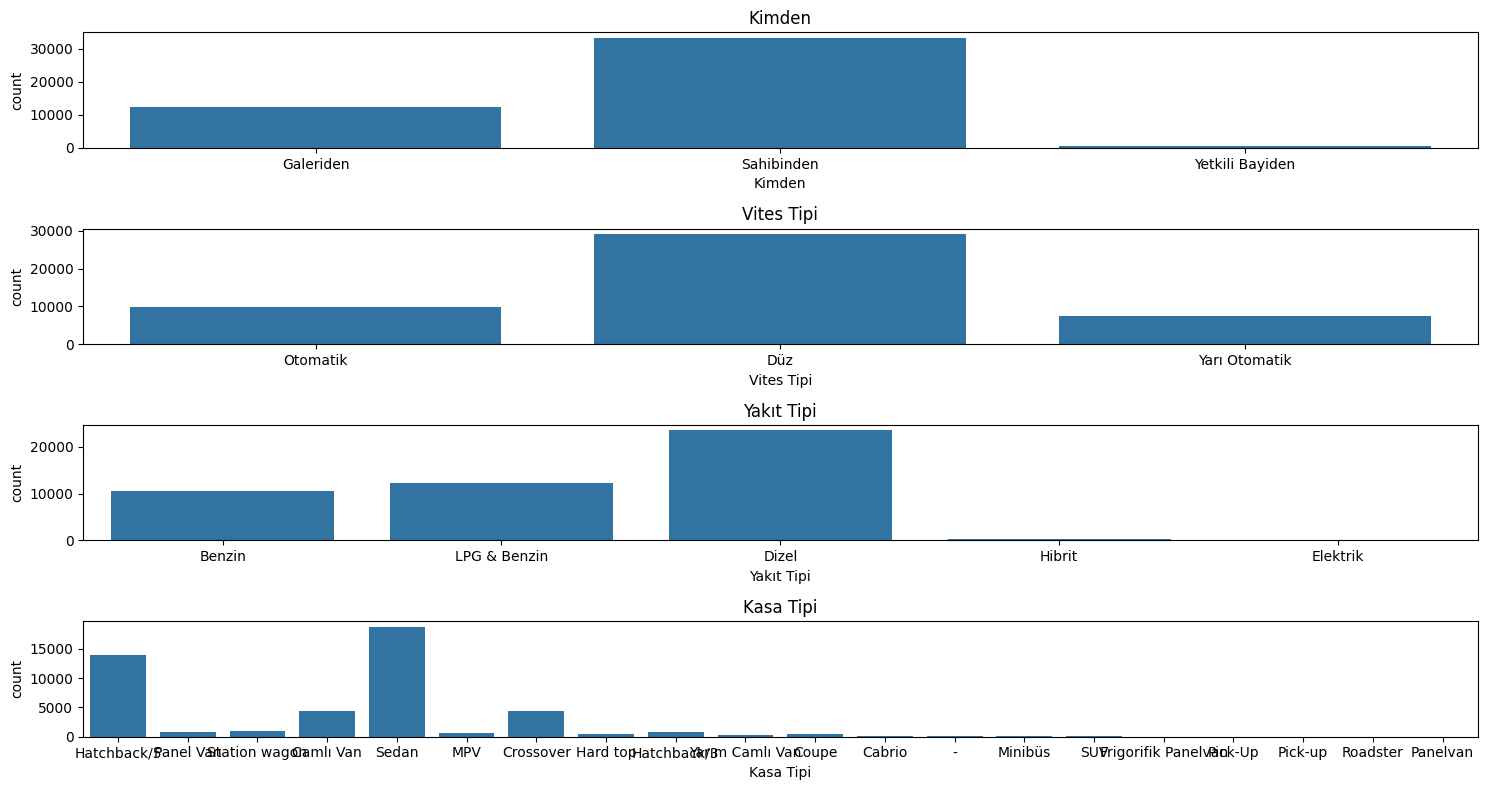

In [15]:
# One-hot encoding ile kategorik değişkenlerin sayısal formata dönüştürülmesi

need_onehot = ["Kimden","Vites Tipi","Yakıt Tipi","Kasa Tipi"]

# Kategorik verilerin dağılımları
# Malesef dengeli bir veri yok.
plt.figure(figsize=(15, 8))

for i in range(len(need_onehot)):
    plt.subplot(4, 1, i+1)
    sns.countplot(data=useful_df, x=need_onehot[i])
    plt.title(need_onehot[i])
plt.tight_layout()
plt.show()

In [16]:
label_encoder = LabelEncoder()
# 'Marka' sütununu label encoding işlemine tabi tutalım
useful_df['Marka_encoded'] = label_encoder.fit_transform(useful_df['Marka'])
useful_df.drop(axis=1,columns=["Marka"], inplace=True)
useful_df.head()

/var/folders/hp/d5nqk4nd0jbfjv8r943rc63r0000gn/T/ipykernel_48450/2748794292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['Marka_encoded'] = label_encoder.fit_transform(useful_df['Marka'])
/var/folders/hp/d5nqk4nd0jbfjv8r943rc63r0000gn/T/ipykernel_48450/2748794292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.drop(axis=1,columns=["Marka"], inplace=True)


,Yıl,Kilometre,Yakıt Tipi,Kasa Tipi,Vites Tipi,Motor Hacmi,Motor Gücü,Kimden,Fiyat,Marka_encoded
0,2023,6.084 km,Benzin,Hatchback/5,Otomatik,1200 cm3' e kadar,126 - 150 HP,Galeriden,1.269.750 TL\n1.238.750,11
1,2013,98.000 km,LPG & Benzin,Hatchback/5,Düz,1598 cc,115 hp,Galeriden,576.900,48
2,2022,60.000 km,Dizel,Panel Van,Düz,1499 cm3,102 hp,Galeriden,639.900,48
3,2004,165.000 km,Benzin,Hatchback/5,Otomatik,1388 cc,80 hp,Galeriden,448.000,21
4,1998,415.000 km,LPG & Benzin,Hatchback/5,Düz,1401 - 1600 cm3,101 - 125 HP,Galeriden,280.000,24


In [17]:
# Burada kategorik verileri encode ediyoruz

# OneHotEncoder'ı tanımlayalım
onehot_encoder_yakit = OneHotEncoder()
onehot_encoder_kimden = OneHotEncoder()
onehot_encoder_vites = OneHotEncoder()
onehot_encoder_kasa = OneHotEncoder()

# Her bir sütunu ayrı ayrı dönüştürelim
yakit_tipi_encoded = onehot_encoder_yakit.fit_transform(useful_df[['Yakıt Tipi']])
kimden_encoded = onehot_encoder_kimden.fit_transform(useful_df[['Kimden']])
vites_tipi_encoded = onehot_encoder_vites.fit_transform(useful_df[['Vites Tipi']])
kasa_tipi_encoded = onehot_encoder_kasa.fit_transform(useful_df[['Kasa Tipi']])


# Dönüştürülmüş sütunları DataFrame'e ekleyelim
yakit_tipi_encoded_df = pd.DataFrame(yakit_tipi_encoded.toarray(), columns=onehot_encoder_yakit.get_feature_names_out(["Yakıt Tipi"]))
kimden_encoded_df = pd.DataFrame(kimden_encoded.toarray(), columns=onehot_encoder_kimden.get_feature_names_out(["Kimden"]))
vites_tipi_encoded_df = pd.DataFrame(vites_tipi_encoded.toarray(), columns=onehot_encoder_vites.get_feature_names_out(["Vites Tipi"]))
kasa_tipi_encoded_df = pd.DataFrame(kasa_tipi_encoded.toarray(), columns=onehot_encoder_kasa.get_feature_names_out(["Kasa Tipi"]))


df_encoded_df = pd.concat([yakit_tipi_encoded_df, kimden_encoded_df, vites_tipi_encoded_df, kasa_tipi_encoded_df], axis=1)
useful_df = pd.concat([useful_df, df_encoded_df], axis=1)

In [18]:
useful_df.drop(axis=1,columns=["Kimden","Vites Tipi","Yakıt Tipi","Kasa Tipi"], inplace=True)
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46495 entries, 0 to 46494
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Yıl                            46495 non-null  int64  
 1   Kilometre                      46495 non-null  object 
 2   Motor Hacmi                    46495 non-null  object 
 3   Motor Gücü                     46495 non-null  object 
 4   Fiyat                          46495 non-null  object 
 5   Marka_encoded                  46495 non-null  int64  
 6   Yakıt Tipi_Benzin              46495 non-null  float64
 7   Yakıt Tipi_Dizel               46495 non-null  float64
 8   Yakıt Tipi_Elektrik            46495 non-null  float64
 9   Yakıt Tipi_Hibrit              46495 non-null  float64
 10  Yakıt Tipi_LPG & Benzin        46495 non-null  float64
 11  Kimden_Galeriden               46495 non-null  float64
 12  Kimden_Sahibinden              46495 non-null 

In [19]:
# Burada Kilometre sütununu float değere çevirdik.
useful_df['Kilometre'] = useful_df['Kilometre'].str.split().str[0]
useful_df['Kilometre'] = useful_df['Kilometre'].str.replace('.', '')
useful_df['Kilometre'] = useful_df['Kilometre'].astype(float)

In [20]:
# Burada Fiyat sütununu float değere çevirdik.
useful_df['Fiyat'] = useful_df['Fiyat'].str.split().str[0]
useful_df['Fiyat'] = useful_df['Fiyat'].str.replace('.', '')
useful_df['Fiyat'] = useful_df['Fiyat'].astype(float)

In [21]:
# Motor Hacmi ve Motor Gücü sütunlarında arada "-" şeklinde veriler girilmiş. Bunlar verileri encode etmemi engelliyor. Sayıları az olduğu için drop ediyorum
useful_df = useful_df.drop(useful_df[useful_df['Motor Hacmi'] == '-'].index)
useful_df = useful_df.drop(useful_df[useful_df['Motor Gücü'] == '-'].index)

In [22]:
# Burada Motor Hacmi sütununu float değere çevirdik.
useful_df['Motor Hacmi'] = useful_df['Motor Hacmi'].str.split().str[0]
useful_df['Motor Hacmi'] = useful_df['Motor Hacmi'].str.replace('.', '')
useful_df['Motor Hacmi'] = useful_df['Motor Hacmi'].astype(float)

In [23]:
# Burada Motor Gücü sütununu float değere çevirdik.
useful_df['Motor Gücü'] = useful_df['Motor Gücü'].str.split().str[0]
useful_df['Motor Gücü'] = useful_df['Motor Gücü'].str.replace('.', '')
useful_df['Motor Gücü'] = useful_df['Motor Gücü'].astype(float)

In [24]:
# index numaralarını düzenledik
useful_df.reset_index(drop=True, inplace=True)

In [25]:
# Artık elimizde tamamen sayısal değerlerden oluşan ve modele eğitim için vermeye hazır bir veri var.
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46316 entries, 0 to 46315
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Yıl                            46316 non-null  int64  
 1   Kilometre                      46316 non-null  float64
 2   Motor Hacmi                    46316 non-null  float64
 3   Motor Gücü                     46316 non-null  float64
 4   Fiyat                          46316 non-null  float64
 5   Marka_encoded                  46316 non-null  int64  
 6   Yakıt Tipi_Benzin              46316 non-null  float64
 7   Yakıt Tipi_Dizel               46316 non-null  float64
 8   Yakıt Tipi_Elektrik            46316 non-null  float64
 9   Yakıt Tipi_Hibrit              46316 non-null  float64
 10  Yakıt Tipi_LPG & Benzin        46316 non-null  float64
 11  Kimden_Galeriden               46316 non-null  float64
 12  Kimden_Sahibinden              46316 non-null 

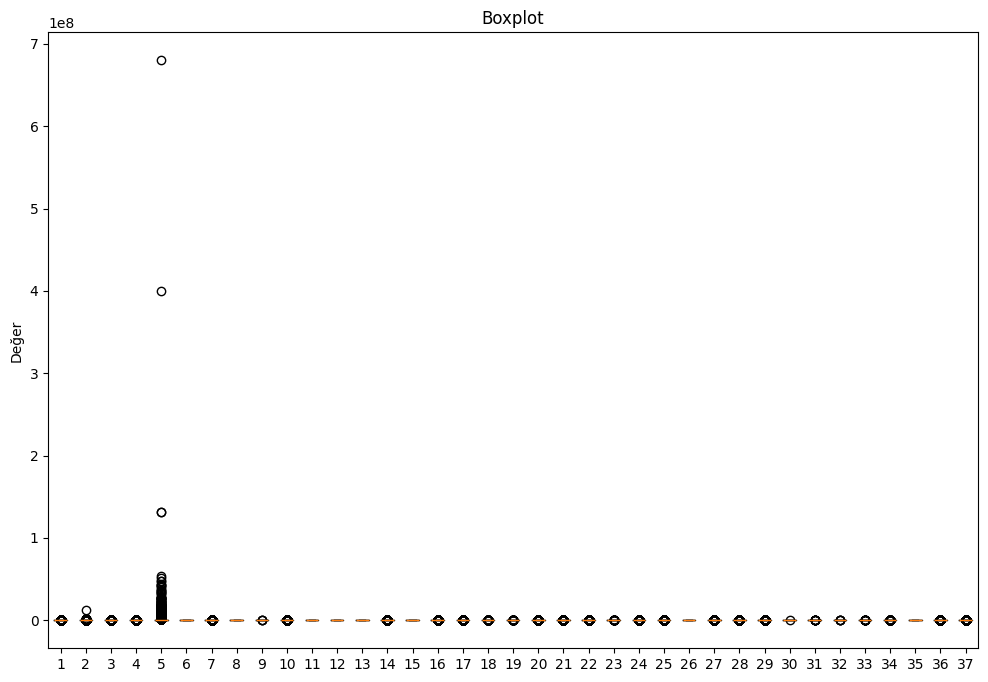

In [26]:
# Verideki bazı sütunlar milyon değerine kadar çıkabiliyor. Bu yüzden outlier analizi yapılmalı ve değerler normalize edilmeli.
plt.figure(figsize=(12, 8))
plt.boxplot(useful_df)
plt.title('Boxplot')
plt.ylabel('Değer')
plt.show()

# 5. sütunda yani fiyatta outlier özellikler var. IQR Analizi ile temizleyebiliriz

In [40]:
# Çeyreklerin hesaplanması
Q1 = useful_df["Fiyat"].quantile(0.25)
Q3 = useful_df["Fiyat"].quantile(0.75)

# IQR'nin hesaplanması
IQR = Q3 - Q1

# Aykırı değerlerin tanımlanması
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin belirlenmesi
outliers = useful_df["Fiyat"][(useful_df["Fiyat"] < lower_bound) | (useful_df["Fiyat"] > upper_bound)]

print("Aykırı Değerler:")
print(outliers)

# Burada 2558 tane veri ıqr analizine göre outlier olarak sınıflandırılmış. Bunları drop edip etmemek size kalmış. Şimdilik drop edicem

Aykırı Değerler:
57       2350000.0
84       1650000.0
91       1485750.0
94       1375000.0
149      1470000.0
           ...    
46224    2325000.0
46226    2320000.0
46257    1450000.0
46258    2340000.0
46259    2250000.0
Name: Fiyat, Length: 1870, dtype: float64


In [39]:
ready_to_train = useful_df.drop(outliers.index)
ready_to_train.reset_index(drop=True, inplace=True)

KeyError: '[(0, 16150), (0, 21613), (0, 21834), (2, 258), (2, 2567), (2, 4207), (2, 7046), (2, 7755), (2, 7835), (2, 8111), (2, 8673), (2, 11605), (2, 13432), (2, 13433), (2, 17704), (2, 18136), (2, 18882), (2, 21699), (2, 21702), (2, 26483), (2, 27964), (2, 28271), (2, 28394), (2, 28769), (2, 29791), (2, 32760), (2, 33692), (2, 38305), (2, 38527), (2, 38529), (2, 38615), (2, 38725), (2, 38732), (2, 38734), (2, 38767), (2, 38774), (2, 38776), (2, 38792), (2, 38808), (2, 38822), (2, 38837), (2, 38855), (2, 38878), (2, 38894), (2, 38895), (2, 38906), (2, 38923), (2, 40508), (2, 40569), (2, 40590), (2, 40596), (2, 40691), (2, 40693), (2, 40753), (2, 40848), (2, 40973), (2, 40987), (2, 41108), (2, 41138), (2, 41180), (2, 41220), (2, 42019), (2, 42196), (2, 42639), (2, 43095), (2, 46212), (2, 46216), (2, 46220), (4, 256), (4, 405), (4, 5384), (4, 5420), (4, 7249), (4, 7250), (4, 7265), (4, 11611), (4, 11612), (4, 11856), (4, 11859), (4, 11944), (4, 12459), (4, 14001), (4, 14278), (4, 14460), (4, 15805), (4, 19532), (4, 19533), (4, 21658), (4, 22096), (4, 26558), (4, 26824), (4, 26855), (4, 27774), (4, 28768), (4, 28774), (4, 29011), (4, 30452), (4, 30813), (4, 32798), (4, 32799), (4, 33128), (4, 33245), (4, 33812), (4, 34219), (4, 34289), (4, 37664), (4, 37725), (4, 38463), (4, 38469), (4, 38534), (4, 38665), (4, 38668), (4, 38674), (4, 38736), (4, 38761), (4, 38834), (4, 38904), (4, 39557), (4, 40472), (4, 40501), (4, 40511), (4, 40542), (4, 40570), (4, 40642), (4, 40695), (4, 40728), (4, 40754), (4, 40788), (4, 40810), (4, 40827), (4, 40830), (4, 40877), (4, 40890), (4, 40896), (4, 40897), (4, 40921), (4, 40941), (4, 40945), (4, 40946), (4, 40974), (4, 40988), (4, 41003), (4, 41035), (4, 41057), (4, 41184), (4, 41223), (4, 41274), (4, 42011), (4, 42016), (4, 42017), (4, 42020), (4, 42038), (4, 42050), (4, 42937), (4, 43084), (4, 43089), (4, 43091), (4, 43132), (4, 43186), (4, 43583), (4, 43877), (5, 38456), (5, 42184), (9, 1974), (9, 5989), (9, 8499), (9, 8837), (9, 13820), (9, 16433), (9, 16717), (9, 19230), (9, 19385), (9, 19539), (9, 20174), (9, 28982), (9, 38440), (9, 38902), (9, 38907), (9, 40214), (9, 40559), (9, 40594), (9, 40631), (9, 40749), (9, 40953), (9, 41989), (9, 44823), (11, 0), (11, 175), (11, 664), (11, 668), (11, 1543), (11, 2859), (11, 5293), (11, 5709), (11, 5755), (11, 6500), (11, 7134), (11, 7257), (11, 7359), (11, 7477), (11, 7867), (11, 8087), (11, 8088), (11, 8209), (11, 10057), (11, 11043), (11, 11796), (11, 11826), (11, 11949), (11, 12069), (11, 12196), (11, 13056), (11, 13089), (11, 14436), (11, 14518), (11, 14839), (11, 15967), (11, 17533), (11, 17546), (11, 17586), (11, 18113), (11, 18294), (11, 19038), (11, 19306), (11, 19392), (11, 19559), (11, 21802), (11, 21860), (11, 22162), (11, 22201), (11, 22758), (11, 22948), (11, 23791), (11, 24495), (11, 25725), (11, 25915), (11, 26607), (11, 26746), (11, 26902), (11, 27015), (11, 27079), (11, 28140), (11, 28238), (11, 28411), (11, 28441), (11, 28512), (11, 30276), (11, 30364), (11, 31010), (11, 32077), (11, 37140), (11, 38624), (11, 38678), (11, 38681), (11, 39562), (11, 40768), (11, 41076), (11, 41078), (11, 41508), (11, 41731), (11, 42208), (11, 42589), (11, 43021), (11, 43166), (11, 43949), (11, 44574), (11, 45258), (11, 45794), (11, 46031), (11, 46076), (13, 22400), (15, 4078), (15, 11696), (15, 14190), (15, 16481), (15, 19817), (15, 26370), (15, 26371), (15, 26588), (15, 29264), (15, 37797), (16, 36836), (18, 40582), (19, 42192), (20, 1183), (20, 4304), (20, 13575), (20, 14989), (20, 17689), (20, 19557), (20, 19981), (20, 25905), (20, 26827), (20, 26858), (20, 36873), (20, 39246), (20, 40122), (20, 40917), (20, 41367), (20, 43717), (20, 43943), (20, 45630), (21, 245), (21, 381), (21, 807), (21, 813), (21, 828), (21, 1280), (21, 1395), (21, 2783), (21, 2786), (21, 2835), (21, 3191), (21, 3984), (21, 4421), (21, 5247), (21, 5299), (21, 5329), (21, 5367), (21, 7171), (21, 7217), (21, 7342), (21, 7632), (21, 7913), (21, 8201), (21, 8586), (21, 9652), (21, 10210), (21, 11204), (21, 11694), (21, 11823), (21, 12729), (21, 12980), (21, 13711), (21, 13814), (21, 14213), (21, 14550), (21, 14724), (21, 15057), (21, 15382), (21, 16129), (21, 16130), (21, 16131), (21, 16136), (21, 16640), (21, 16829), (21, 17106), (21, 17108), (21, 17221), (21, 17316), (21, 17317), (21, 17356), (21, 17451), (21, 17465), (21, 17468), (21, 17553), (21, 18209), (21, 18248), (21, 18287), (21, 19820), (21, 19835), (21, 20161), (21, 20337), (21, 20676), (21, 21095), (21, 21565), (21, 21781), (21, 21849), (21, 21880), (21, 22019), (21, 22224), (21, 22233), (21, 22818), (21, 22851), (21, 23744), (21, 24729), (21, 25066), (21, 26407), (21, 26608), (21, 28373), (21, 29199), (21, 29382), (21, 30312), (21, 30326), (21, 30384), (21, 32564), (21, 32610), (21, 33144), (21, 35829), (21, 36082), (21, 37004), (21, 37263), (21, 37569), (21, 37575), (21, 37961), (21, 38037), (21, 38045), (21, 38206), (21, 38389), (21, 38540), (21, 38571), (21, 38743), (21, 39114), (21, 39475), (21, 39883), (21, 40253), (21, 40470), (21, 40575), (21, 40595), (21, 40696), (21, 40863), (21, 41118), (21, 41119), (21, 41586), (21, 42711), (21, 42926), (21, 42979), (21, 43314), (21, 43647), (21, 44556), (21, 44861), (21, 45708), (21, 46255), (24, 5641), (24, 7370), (24, 8405), (24, 8634), (24, 9637), (24, 11810), (24, 14481), (24, 15129), (24, 15130), (24, 15587), (24, 15808), (24, 16366), (24, 18135), (24, 21637), (24, 21676), (24, 22204), (24, 22715), (24, 25811), (24, 39811), (24, 40637), (24, 41142), (24, 41143), (24, 41207), (26, 295), (26, 467), (26, 1178), (26, 2795), (26, 3138), (26, 3563), (26, 4963), (26, 5045), (26, 5255), (26, 5292), (26, 5294), (26, 5296), (26, 5447), (26, 5818), (26, 5830), (26, 5896), (26, 6025), (26, 6429), (26, 6432), (26, 6762), (26, 7329), (26, 7946), (26, 8004), (26, 9875), (26, 10011), (26, 11488), (26, 11897), (26, 12202), (26, 12216), (26, 12519), (26, 12764), (26, 13426), (26, 14240), (26, 14259), (26, 14280), (26, 14423), (26, 16393), (26, 16569), (26, 17422), (26, 18137), (26, 18142), (26, 18291), (26, 18426), (26, 18471), (26, 19027), (26, 19841), (26, 20638), (26, 21799), (26, 21810), (26, 22056), (26, 22356), (26, 22985), (26, 23788), (26, 25073), (26, 25934), (26, 26473), (26, 26646), (26, 26686), (26, 27064), (26, 27518), (26, 27983), (26, 28390), (26, 29480), (26, 30104), (26, 30855), (26, 30972), (26, 32322), (26, 32576), (26, 33026), (26, 33229), (26, 33779), (26, 33810), (26, 33996), (26, 34469), (26, 34928), (26, 34958), (26, 35016), (26, 36768), (26, 37198), (26, 37209), (26, 37475), (26, 37476), (26, 37815), (26, 38324), (26, 38654), (26, 38992), (26, 39501), (26, 40157), (26, 40390), (26, 41951), (26, 42049), (26, 42287), (26, 42383), (26, 42638), (26, 42695), (26, 42821), (26, 42862), (26, 42866), (26, 42869), (26, 42873), (26, 44001), (26, 44087), (26, 44669), (26, 45325), (26, 45369), (26, 45781), (28, 12917), (29, 16931), (29, 17430), (29, 25912), (29, 26011), (29, 46128), (31, 40783), (32, 257), (32, 8640), (32, 16686), (32, 35365), (32, 37516), (32, 40892), (32, 40893), (32, 41221), (33, 6745), (33, 11747), (33, 19531), (33, 31698), (33, 32800), (33, 34100), (33, 38575), (33, 42664), (33, 43467), (33, 46017), (34, 3728), (34, 20320), (34, 21494), (34, 23624), (34, 26033), (34, 28794), (35, 40758), (36, 38724), (36, 38805), (37, 24773), (37, 38455), (37, 38646), (37, 38809), (37, 38838), (37, 38853), (37, 40938), (37, 41043), (37, 41140), (37, 42189), (37, 43102), (38, 40632), (39, 40817), (41, 38919), (43, 40935), (44, 4647), (44, 23351), (44, 42846), (45, 3165), (45, 3188), (45, 4305), (45, 6039), (45, 7263), (45, 11364), (45, 13450), (45, 15804), (45, 16231), (45, 16527), (45, 18145), (45, 20278), (45, 28773), (45, 32181), (45, 38047), (45, 38143), (45, 38449), (45, 38450), (45, 38451), (45, 38528), (45, 38530), (45, 38677), (45, 38683), (45, 38689), (45, 38722), (45, 38742), (45, 38766), (45, 38777), (45, 38780), (45, 38832), (45, 38833), (45, 38839), (45, 38840), (45, 38849), (45, 38866), (45, 38884), (45, 38909), (45, 39502), (45, 39756), (45, 40502), (45, 40557), (45, 40577), (45, 40597), (45, 40620), (45, 40623), (45, 40654), (45, 40655), (45, 40656), (45, 40657), (45, 40658), (45, 40659), (45, 40660), (45, 40694), (45, 40718), (45, 40732), (45, 40734), (45, 40752), (45, 40755), (45, 40760), (45, 40801), (45, 40802), (45, 40835), (45, 40836), (45, 40837), (45, 40838), (45, 40839), (45, 40866), (45, 40891), (45, 40904), (45, 40925), (45, 40934), (45, 40948), (45, 40951), (45, 40972), (45, 41011), (45, 41031), (45, 41038), (45, 41046), (45, 41111), (45, 41249), (45, 41279), (45, 41622), (45, 42003), (45, 42013), (45, 42051), (45, 42058), (45, 42101), (45, 42108), (45, 42115), (45, 42116), (45, 42117), (45, 42182), (45, 42185), (45, 42186), (45, 42194), (45, 42195), (45, 42197), (45, 42941), (45, 42996), (45, 43085), (45, 43087), (45, 43088), (45, 43098), (45, 43101), (45, 43103), (45, 43187), (45, 45313), (45, 45357), (45, 46223), (46, 9260), (46, 25995), (46, 26015), (46, 40939), (47, 1155), (47, 2102), (47, 13445), (47, 13462), (47, 13984), (47, 15357), (47, 19693), (47, 23174), (47, 24060), (47, 28145), (47, 30622), (47, 37173), (47, 40406), (47, 40437), (47, 40865), (47, 41736), (47, 42209), (47, 42841), (48, 56), (48, 879), (48, 1386), (48, 1387), (48, 1402), (48, 1500), (48, 1546), (48, 1566), (48, 2148), (48, 2492), (48, 4466), (48, 5093), (48, 5094), (48, 5095), (48, 5102), (48, 5121), (48, 5122), (48, 5123), (48, 5200), (48, 5647), (48, 7140), (48, 7279), (48, 9176), (48, 9690), (48, 11494), (48, 11906), (48, 12141), (48, 12532), (48, 13147), (48, 13444), (48, 14558), (48, 15292), (48, 15731), (48, 15762), (48, 15776), (48, 17683), (48, 18128), (48, 19099), (48, 20740), (48, 21719), (48, 21940), (48, 22401), (48, 22704), (48, 22750), (48, 22893), (48, 23984), (48, 26403), (48, 26552), (48, 26693), (48, 26872), (48, 28070), (48, 28156), (48, 28180), (48, 28528), (48, 30997), (48, 32434), (48, 33004), (48, 33780), (48, 33785), (48, 35879), (48, 36979), (48, 38157), (48, 38417), (48, 39867), (48, 40015), (48, 40239), (48, 40295), (48, 40464), (48, 41507), (48, 41697), (48, 41748), (48, 42198), (48, 42643), (48, 42739), (48, 43998), (48, 44460), (48, 44622), (48, 44697), (48, 45143), (48, 45495), (48, 45568), (48, 45719), (49, 109), (49, 309), (49, 318), (49, 379), (49, 507), (49, 591), (49, 604), (49, 900), (49, 1109), (49, 1547), (49, 2067), (49, 2363), (49, 2482), (49, 2518), (49, 3143), (49, 3338), (49, 3676), (49, 3997), (49, 4721), (49, 5087), (49, 5319), (49, 5347), (49, 5440), (49, 5587), (49, 5758), (49, 5792), (49, 5827), (49, 5953), (49, 6120), (49, 6295), (49, 6414), (49, 6560), (49, 6585), (49, 6587), (49, 6615), (49, 7255), (49, 7256), (49, 7406), (49, 7432), (49, 7629), (49, 7796), (49, 8256), (49, 8588), (49, 8853), (49, 9000), (49, 11642), (49, 11834), (49, 12392), (49, 12409), (49, 12713), (49, 12775), (49, 12887), (49, 13032), (49, 13041), (49, 13893), (49, 14416), (49, 14424), (49, 14426), (49, 14427), (49, 14491), (49, 14922), (49, 14928), (49, 15170), (49, 15489), (49, 15764), (49, 15986), (49, 16471), (49, 16503), (49, 16763), (49, 17248), (49, 17296), (49, 17302), (49, 17638), (49, 17713), (49, 17757), (49, 17896), (49, 17959), (49, 17971), (49, 18148), (49, 18250), (49, 18270), (49, 18337), (49, 18739), (49, 18880), (49, 18930), (49, 19216), (49, 19465), (49, 19594), (49, 19726), (49, 20228), (49, 20283), (49, 20784), (49, 21036), (49, 21091), (49, 21456), (49, 21500), (49, 21681), (49, 21780), (49, 21787), (49, 21801), (49, 21815), (49, 21875), (49, 21886), (49, 21889), (49, 22123), (49, 22146), (49, 22364), (49, 22418), (49, 22599), (49, 22620), (49, 22746), (49, 23260), (49, 23263), (49, 23519), (49, 23570), (49, 23631), (49, 24084), (49, 24303), (49, 24612), (49, 24631), (49, 24667), (49, 24989), (49, 25096), (49, 25338), (49, 25717), (49, 25876), (49, 26006), (49, 26130), (49, 26645), (49, 26659), (49, 27575), (49, 27759), (49, 27801), (49, 27874), (49, 28251), (49, 28403), (49, 28406), (49, 28551), (49, 28923), (49, 29217), (49, 29365), (49, 30078), (49, 30267), (49, 31123), (49, 31253), (49, 31753), (49, 31842), (49, 32278), (49, 33350), (49, 33444), (49, 33555), (49, 33669), (49, 33808), (49, 34364), (49, 35359), (49, 35423), (49, 35813), (49, 35872), (49, 36259), (49, 36484), (49, 37029), (49, 37250), (49, 37808), (49, 37835), (49, 38174), (49, 38180), (49, 38307), (49, 38526), (49, 38589), (49, 38812), (49, 38850), (49, 39118), (49, 39172), (49, 39196), (49, 39402), (49, 39429), (49, 39528), (49, 39602), (49, 39608), (49, 39872), (49, 39971), (49, 39981), (49, 40036), (49, 40280), (49, 40299), (49, 40327), (49, 40408), (49, 40439), (49, 40506), (49, 40613), (49, 40886), (49, 41028), (49, 41085), (49, 41192), (49, 41477), (49, 42160), (49, 42400), (49, 42411), (49, 42414), (49, 42621), (49, 42679), (49, 42702), (49, 42775), (49, 42787), (49, 42858), (49, 42870), (49, 42872), (49, 42906), (49, 43094), (49, 43506), (49, 43665), (49, 43713), (49, 43881), (49, 44195), (49, 44226), (49, 44400), (49, 44543), (49, 44631), (49, 44740), (49, 44820), (49, 44904), (49, 44974), (49, 45042), (49, 45043), (49, 45090), (49, 45160), (49, 45245), (49, 45257), (49, 45569), (49, 45757), (49, 45786), (49, 46062), (49, 46194), (49, 46250), (50, 38447), (50, 40759), (51, 37196), (52, 357), (52, 602), (52, 1422), (52, 2578), (52, 3201), (52, 3976), (52, 4330), (52, 5226), (52, 5779), (52, 5907), (52, 6193), (52, 7738), (52, 7800), (52, 8049), (52, 9249), (52, 9874), (52, 10750), (52, 12245), (52, 12253), (52, 12444), (52, 12585), (52, 12646), (52, 12727), (52, 12846), (52, 14955), (52, 14958), (52, 15280), (52, 15389), (52, 15753), (52, 16011), (52, 17952), (52, 18296), (52, 18510), (52, 18827), (52, 21275), (52, 21539), (52, 21655), (52, 21708), (52, 21710), (52, 22511), (52, 22590), (52, 22787), (52, 22788), (52, 22936), (52, 22942), (52, 22945), (52, 23192), (52, 23364), (52, 23953), (52, 24191), (52, 26000), (52, 26017), (52, 26272), (52, 26358), (52, 26361), (52, 26639), (52, 26640), (52, 26870), (52, 27012), (52, 27016), (52, 27953), (52, 28709), (52, 28910), (52, 29071), (52, 29103), (52, 29150), (52, 29418), (52, 29815), (52, 29818), (52, 31204), (52, 31332), (52, 32039), (52, 34819), (52, 36226), (52, 37088), (52, 37541), (52, 38721), (52, 38829), (52, 39681), (52, 39908), (52, 40038), (52, 40393), (52, 40484), (52, 41393), (52, 41453), (52, 41510), (52, 41680), (52, 41741), (52, 41839), (52, 41894), (52, 42290), (52, 42340), (52, 42627), (52, 42713), (52, 43371), (52, 43787), (52, 44097), (52, 44200), (52, 44274), (52, 44541), (52, 45398), (52, 45490), (52, 45698), (52, 46043), (52, 46111), (54, 633), (54, 16715), (55, 6116), (56, 6382), (56, 9665), (56, 14419), (56, 18970), (56, 36512), (56, 37564), (56, 38771), (56, 38846), (56, 43348), (56, 44930), (56, 45001), (57, 8745), (57, 13535), (57, 14211), (57, 14279), (57, 14417), (57, 21511), (57, 21982), (57, 27890), (57, 28423), (57, 28445), (57, 30262), (57, 34206), (57, 38692), (57, 42012), (61, 42082), (62, 14429), (64, 7588), (64, 8885), (64, 9994), (64, 10132), (64, 14008), (64, 15487), (64, 21023), (64, 21214), (64, 21467), (64, 25487), (64, 29729), (64, 34120), (64, 34438), (64, 41066), (64, 45862), (65, 1602), (65, 2059), (65, 2481), (65, 3391), (65, 3805), (65, 5932), (65, 7376), (65, 7917), (65, 9012), (65, 9753), (65, 10242), (65, 13588), (65, 13958), (65, 14332), (65, 14418), (65, 14425), (65, 15068), (65, 16283), (65, 16925), (65, 16932), (65, 17327), (65, 17706), (65, 17814), (65, 19390), (65, 19887), (65, 21659), (65, 21734), (65, 21791), (65, 21845), (65, 22092), (65, 22157), (65, 22279), (65, 22280), (65, 22324), (65, 22892), (65, 23159), (65, 25087), (65, 26024), (65, 28437), (65, 28781), (65, 30488), (65, 31814), (65, 32540), (65, 33368), (65, 33369), (65, 37687), (65, 38641), (65, 38676), (65, 38844), (65, 38901), (65, 38918), (65, 38956), (65, 39193), (65, 40621), (65, 40622), (65, 40669), (65, 40733), (65, 41562), (65, 42083), (65, 42938), (65, 43097), (65, 43099), (65, 43184), (65, 45604), (66, 33), (66, 41), (66, 185), (66, 260), (66, 648), (66, 973), (66, 1001), (66, 1404), (66, 2043), (66, 2773), (66, 2784), (66, 3177), (66, 3334), (66, 3481), (66, 3682), (66, 3769), (66, 4177), (66, 4221), (66, 4222), (66, 5152), (66, 5245), (66, 5287), (66, 5288), (66, 5418), (66, 5917), (66, 6130), (66, 6131), (66, 6283), (66, 6463), (66, 6493), (66, 6507), (66, 6604), (66, 6684), (66, 7259), (66, 7266), (66, 7415), (66, 7421), (66, 7597), (66, 7805), (66, 8394), (66, 8675), (66, 8781), (66, 9696), (66, 9718), (66, 10663), (66, 11050), (66, 11600), (66, 11604), (66, 11618), (66, 11631), (66, 11779), (66, 11809), (66, 11833), (66, 11842), (66, 11924), (66, 12689), (66, 12769), (66, 13299), (66, 13429), (66, 13828), (66, 14006), (66, 14329), (66, 14384), (66, 14414), (66, 14494), (66, 15096), (66, 15202), (66, 16805), (66, 16849), (66, 16930), (66, 16934), (66, 17434), (66, 17956), (66, 18140), (66, 18506), (66, 18599), (66, 19029), (66, 19832), (66, 19925), (66, 19941), (66, 19985), (66, 20223), (66, 20226), (66, 20231), (66, 20361), (66, 20362), (66, 20428), (66, 21150), (66, 21443), (66, 21522), (66, 21580), (66, 22406), (66, 22641), (66, 24194), (66, 24469), (66, 24520), (66, 24810), (66, 25136), (66, 25239), (66, 25585), (66, 25681), (66, 25734), (66, 25791), (66, 26658), (66, 26683), (66, 26729), (66, 27155), (66, 27167), (66, 27188), (66, 27209), (66, 27449), (66, 27811), (66, 27851), (66, 27852), (66, 28273), (66, 28439), (66, 28772), (66, 28777), (66, 29012), (66, 29197), (66, 29247), (66, 29419), (66, 29461), (66, 29523), (66, 29546), (66, 29563), (66, 29817), (66, 29937), (66, 29942), (66, 30097), (66, 30100), (66, 30624), (66, 30770), (66, 30956), (66, 31622), (66, 32207), (66, 32765), (66, 32801), (66, 32870), (66, 33362), (66, 33554), (66, 33720), (66, 33790), (66, 34267), (66, 35299), (66, 36097), (66, 36438), (66, 36717), (66, 36969), (66, 37440), (66, 37561), (66, 38257), (66, 38286), (66, 38423), (66, 38672), (66, 38811), (66, 38830), (66, 38831), (66, 38914), (66, 38924), (66, 38998), (66, 38999), (66, 39000), (66, 39001), (66, 39018), (66, 39019), (66, 39069), (66, 39070), (66, 39080), (66, 39553), (66, 39772), (66, 40923), (66, 41105), (66, 41117), (66, 41141), (66, 41151), (66, 41229), (66, 41463), (66, 41777), (66, 41984), (66, 42205), (66, 42300), (66, 42325), (66, 42677), (66, 42681), (66, 42833), (66, 42976), (66, 43100), (66, 43104), (66, 43526), (66, 43892), (66, 44435), (66, 44884), (66, 44945), (66, 45013), (66, 45642), (66, 46002), (66, 46214), (66, 46225), (67, 2614), (67, 3566), (67, 13455), (67, 15120), (67, 15168), (67, 17736), (67, 17888), (67, 18146), (67, 19510), (67, 21661), (67, 21662), (67, 21663), (67, 22106), (67, 22174), (67, 25587), (67, 28438), (67, 29792), (67, 30618), (67, 30623), (67, 30627), (67, 32586), (67, 32794), (67, 34357), (67, 38046), (67, 38472), (67, 38691), (67, 38775), (67, 38798), (67, 38835), (67, 39900), (67, 40418), (67, 40449), (67, 40467), (67, 40551), (67, 40645), (67, 40689), (67, 40751), (67, 40784), (67, 40846), (67, 40964), (67, 41001), (67, 42098), (67, 43106), (67, 46213)] not found in axis'

Data Train Test Split

In [41]:
X = ready_to_train.drop("Fiyat", axis = 1)
y = ready_to_train["Fiyat"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 10
                                                    )

scaler_X_test = MinMaxScaler() # bu minmaxscaler işlemi sadece yapay sinir ağı eğitiminde kullanmak için var
scaler_X_train = MinMaxScaler() # yapay sinir ağına vermek için verilerin normalize edilmiş versiyonunu saklıyorum

scaled_X_test = pd.DataFrame(scaler_X_test.fit_transform(X_test), columns=X.columns)
scaled_X_train = pd.DataFrame(scaler_X_train.fit_transform(X_train), columns=X.columns)


Modeling Part

In [42]:
# LinerRegression modeli
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_lr = model_lr.predict(X_train)
test_predictions_lr = model_lr.predict(X_test)
train_rmse_lr = mean_squared_error(y_train, train_predictions_lr, squared=False)
test_rmse_lr = mean_squared_error(y_test, test_predictions_lr, squared=False)

print("Eğitim RMSE:", train_rmse_lr)
print("Test RMSE:", test_rmse_lr)

Eğitim RMSE: 140499.73428429826
Test RMSE: 136363.16095002915


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# XGBoost regresyon modelini oluşturalım ve eğitelim
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_xgb = model_xgb.predict(X_train)
test_predictions_xgb = model_xgb.predict(X_test)
train_rmse_xgb = mean_squared_error(y_train, train_predictions_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, test_predictions_xgb, squared=False)

print("Eğitim RMSE:", train_rmse_xgb)
print("Test RMSE:", test_rmse_xgb)

Eğitim RMSE: 64616.1117151135
Test RMSE: 76190.65012847747


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
# Eğitim ve test hatasını hesaplayalım
train_predictions_rf = model_rf.predict(X_train)
test_predictions_rf = model_rf.predict(X_test)
train_rmse_rf = mean_squared_error(y_train, train_predictions_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, test_predictions_rf, squared=False)

print("Eğitim RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)

# # Eğitim Verisinde güzel sonuç veriyor ama test verisinde çuvallamış. Overfitting olmuş. Bu model geliştirilebilir.

Eğitim RMSE: 30823.35599852266
Test RMSE: 80083.39961329628


/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/berkfatihturan/Desktop/bft/Projects/Python/dataRe/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
